# Week 6
# Plotting with Matplotlib
1. Create a subplot
2. Ajust ticks, legends, and labels
3. Add anotations

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# Download Bitcoin trading data
import json
import requests
endpoint = 'https://min-api.cryptocompare.com/data/histoday'
res = requests.get(endpoint + '?fsym=BTC&tsym=USD&limit=2000')
BTC = pd.DataFrame(json.loads(res.content)['Data'])

# Use time as index
BTC = BTC.set_index('time')
BTC.index = pd.to_datetime(BTC.index, unit='s')

BTC.head(3)

,close,high,low,open,volumefrom,volumeto
time,,,,,,
2015-04-14,217.99,224.72,214.27,223.59,115188.26,25315606.19
2015-04-15,222.97,223.56,217.15,217.99,77228.44,17099352.43
2015-04-16,227.98,229.53,222.87,222.97,84889.10,19315044.09


In [3]:
# Install yahoo finance library
!pip install yfinance

  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22415 sha256=aba564947ad4118d78bdd50406dee023366aa227c46344a19feea16bb13fea71
  Stored in directory: c:\users\fadil\appdata\local\pip\cache\wheels\d9\55\e4\3fc43a4f56c7c18628bc24088be1d7168a832a91efa5ccc5da
  Created wheel for multitasking: filename=multitasking-0.0.9-py3-none-any.whl size=8374 sha256=72a28ae60584bbddcb12f767a9a6c8c3c8beb6d5378f70e9094d5190c90af5bd
  Stored in directory: c:\users\fadil\appdata\local\pip\cache\wheels\57\6d\a3\a39b839cc75274d2acfb1c58bfead2f726c6577fe8c4723f13
Successfully built yfinance multitasking


In [7]:
import yfinance as yf

SPY = yf.download('SPY', start="2015-04-10")
SPY.head(3)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-04-10,209.199997,210.089996,208.960007,210.039993,188.481613,72722900
2015-04-13,209.869995,210.630005,209.029999,209.089996,187.629120,74436600
2015-04-14,208.850006,209.710007,208.100006,209.490005,187.988052,75099900


## 1. Four plots on the price change
- Scatter plot
- Histogram

Text(0.5, 1.0, 'S&P 500 Index')

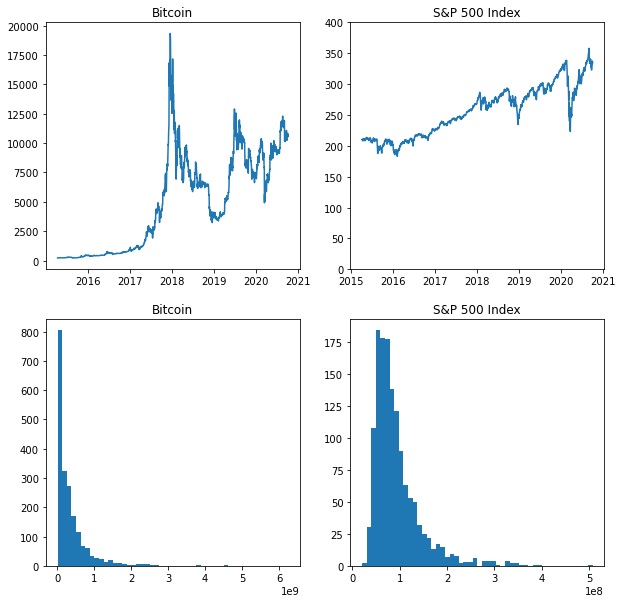

In [8]:
fig = plt.figure(figsize=(10, 10))

# Add axes for the first subplot
ax1 = fig.add_subplot(2, 2, 1) # What do these numbers mean?
                               # (number of rows, number of columns, the index of this particular subplot)

# plot BTC price change (close price vs. time)
ax1.plot(BTC.index, BTC['close'])
ax1.set_title("Bitcoin")

# Add axes for the second subplot
ax2 = fig.add_subplot(2, 2, 2)

# plot SPY price change (close price vs. time)
ax2.plot(SPY.index, SPY['Close'])
ax2.set_title("S&P 500 Index")
ax2.set_ylim([0, 400])

# The third subplot
ax3 = fig.add_subplot(2, 2, 3)
ax3.hist(BTC['volumeto'], bins=50)
ax3.set_title("Bitcoin")

# The fourth subplot
ax4 = fig.add_subplot(2, 2, 4)
ax4.hist(SPY['Volume'], bins=50)
ax4.set_title("S&P 500 Index")

## 2 Ticks, labels, and legends

(2500.0, 15000.0)

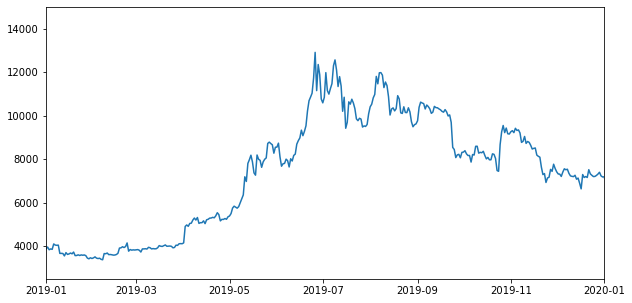

In [11]:
# Specify limits on the x-axis and y-axis
from datetime import datetime

plt.figure(figsize=(10, 5))
plt.plot(BTC.index, BTC['close'])
plt.xlim([datetime(2019, 1, 1), datetime(2020, 1, 1)])
plt.ylim([2500, 15000])

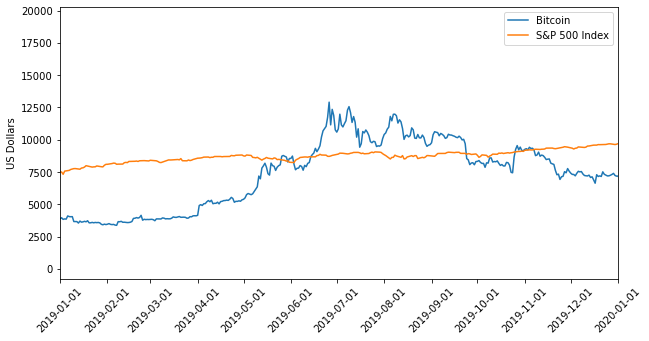

In [12]:
# Show ticks for every month
plt.figure(figsize=(10, 5))
plt.plot(BTC.index, BTC['close'])
plt.plot(SPY.index, SPY['Close'] * 30)
plt.xlim([datetime(2019, 1, 1), datetime(2020, 1, 1)])
ticks = [datetime(2019, x, 1) for x in range(1, 13)]
ticks.append(datetime(2020, 1, 1))
plt.xticks(ticks, rotation=45)

# Add y label
plt.ylabel("US Dollars")

# Add legned
plt.legend(['Bitcoin', 'S&P 500 Index'])

## 3. Add Annotations

Text(2017-05-01 00:00:00, 1500, 'Bitcoin price increased 5 times within 200 days')

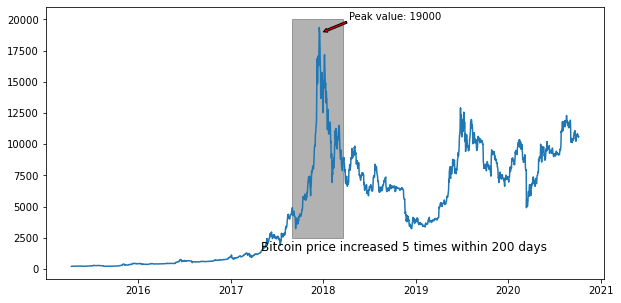

In [20]:
from datetime import timedelta

plt.figure(figsize=(10, 5))
plt.plot(BTC.index, BTC['close'])

# Point out the peak value
plt.annotate('Peak value: 19000',
             xy=(datetime(2018, 1, 1), 19000),
             xytext=(datetime(2018, 1, 1)+timedelta(days=100), 20000),
             arrowprops=dict(facecolor='red', headwidth=4, width=2, headlength=4))

# Highlight the dramatic increase in 2018
rectangle = plt.Rectangle((datetime(2017, 9, 1), 2500),
                          timedelta(days=200),
                          17500,
                          color='k',
                          alpha=0.3)
plt.gca().add_patch(rectangle)

# Add text description
plt.text(datetime(2017, 5, 1),
         1500,
         "Bitcoin price increased 5 times within 200 days",
         fontsize=12)